In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


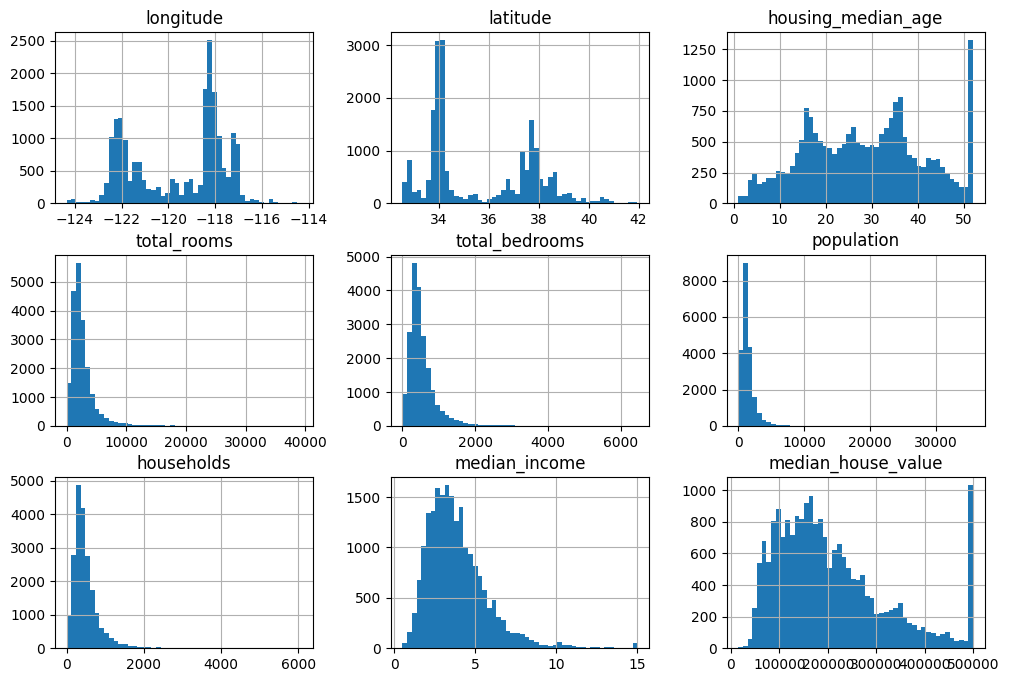

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (12,8))
plt.show()

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

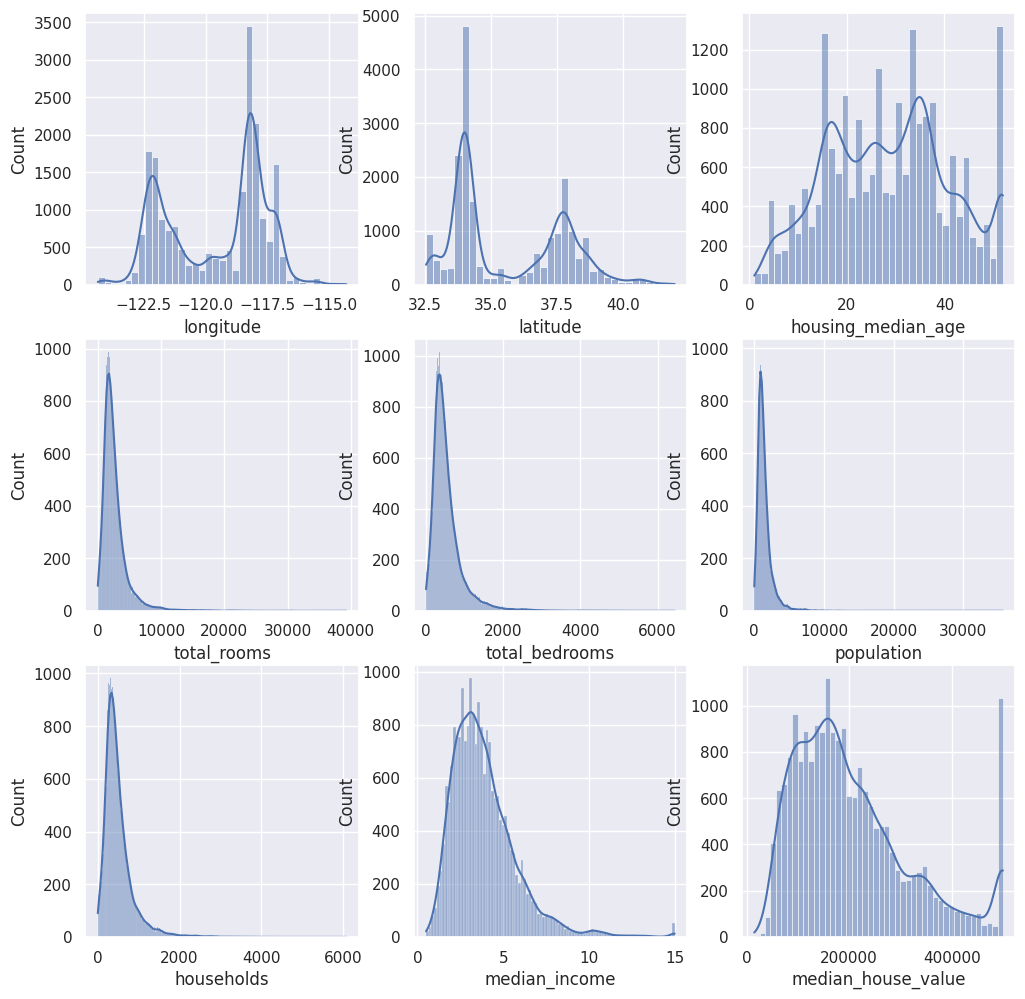

In [ ]:
numercial_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

import seaborn as sns; sns.set()

plt.figure(figsize=(12,12))
for col in numercial_cols:
  plt.subplot(3,3,numercial_cols.index(col)+1)
  sns.histplot(x=col, data=housing, kde=True)




### Create a test set

In [ ]:
import numpy as np
np.random.seed(42)
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]


In [ ]:
train_set, test_set = shuffle_and_split_data(housing,0.2)

In [ ]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

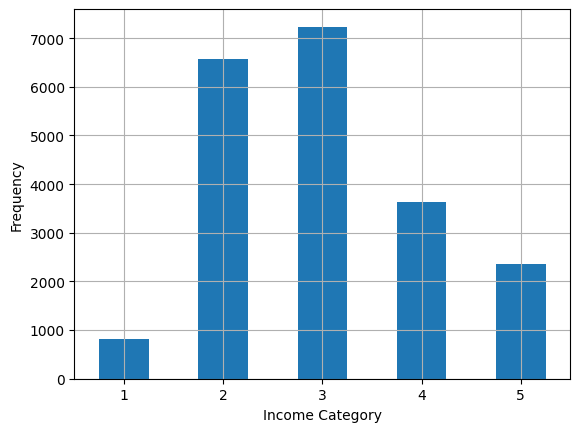

In [ ]:
### Stratify medican income feature
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.show()

In [ ]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

In [ ]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [ ]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
housing['income_cat'].value_counts()/len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

### Explore and Visualize the Data to Gain Insights

In [ ]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


In [ ]:
housing = strat_train_set.copy()

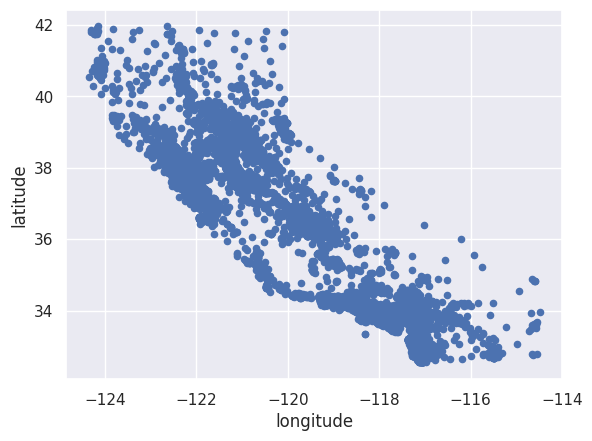

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True)
plt.show()

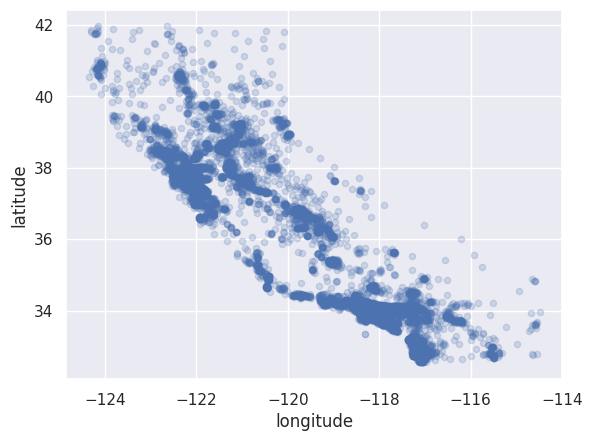

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, grid=True)
plt.show()

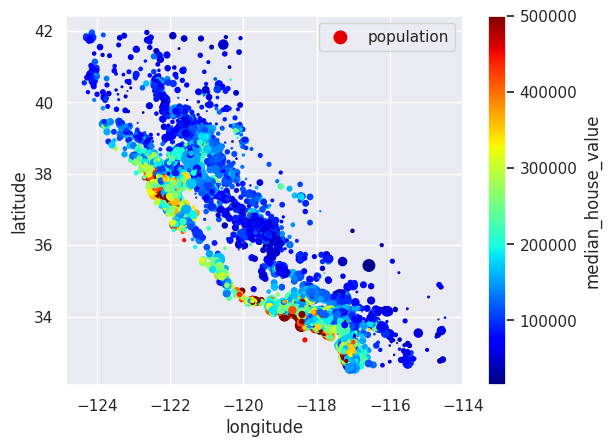

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', s=housing['population']/100, label='population', c='median_house_value', cmap='jet', colorbar=True, grid=True)
plt.legend()

### Look for Correlations

In [ ]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


<Axes: >

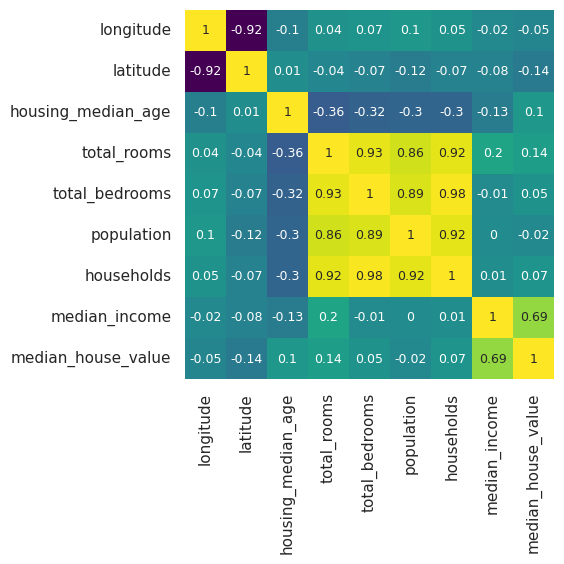

In [ ]:
sns.heatmap(np.round(corr_matrix,2), annot=True, square=True, cmap='viridis', cbar=False, annot_kws={"size": 9})

<Axes: xlabel='median_income', ylabel='median_house_value'>

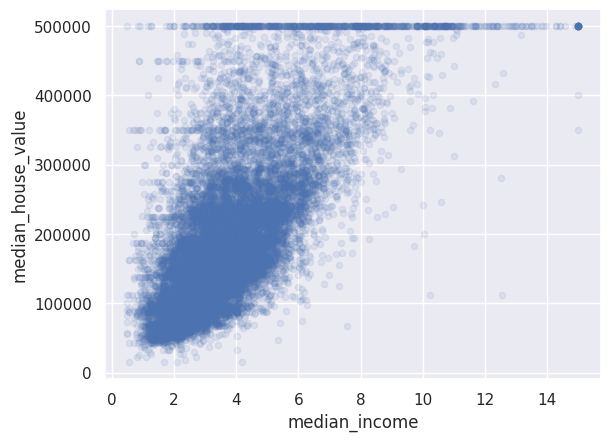

In [ ]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True)

<Axes: xlabel='median_income', ylabel='median_house_value'>

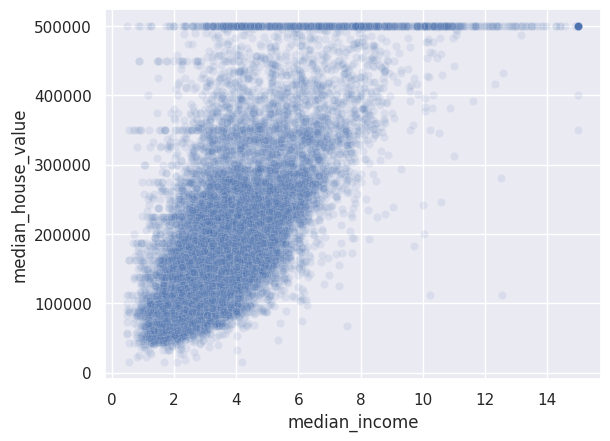

In [ ]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing, alpha=0.1)

### Experiment with Attribute Combinations

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


## Prepare the Data for Machine Learning Algorithms

In [ ]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Clean the data

In [ ]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,168
population,0
households,0
median_income,0
ocean_proximity,0


In [ ]:
## This is one way to impute the na data
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].median())

In [ ]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0


In [ ]:
## using Sci-kit learn to impute data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

housing_numerical = housing.select_dtypes(include=[np.number])
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
housing_numerical.median().to_numpy()

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
X = imputer.transform(housing_numerical)

In [ ]:
imputer.strategy

'median'

### Handling Text and Categorical Attributes

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [ ]:
### Use OrdinalEncoder from Sklearn to encode this categorical feature
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
## Because OrdinalEncoder is not good for this proximity feature, OnehotEncoder will used here
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat_onehot = onehot_encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_onehot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
onehot_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

## Feature Scaling and Transformation

In [ ]:
### MinMaxScaler from -1 to 1 for features, becasue Neutral Networks work best with zero-mean inputs
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_numerical_minmax_scaled = min_max_scaler.fit_transform(housing_numerical)


In [ ]:
housing_numerical_minmax_scaled[:5]

array([[-0.60851927,  0.11702128,  1.        , -0.83117147, -0.64116605,
        -0.80701754, -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, -0.90014752, -0.88629409,
        -0.91866029, -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, -0.94501246, -0.93042358,
        -0.93141946, -0.92458466, -0.73336919],
       [ 0.46855984, -0.74468085, -0.37254902, -0.78778168, -0.7262039 ,
        -0.77401546, -0.70916558, -0.75698266],
       [ 0.25760649, -0.74042553,  0.37254902, -0.77801516, -0.6102432 ,
        -0.76579561, -0.56281501, -0.58217128]])

In [ ]:
### StandardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_numerical_std_scaled = std_scaler.fit_transform(housing_numerical)

### Transformation Pipelines

In [ ]:
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
    ])


In [ ]:
### make_pipline() function can be used without names

from sklearn.pipeline import make_pipeline
numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [ ]:
numerical_housing_prepared = numerical_pipeline.fit_transform(housing_numerical)
numerical_housing_prepared[:4].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17],
       [-1.2 ,  1.28,  0.35, -0.71, -0.76, -0.79, -0.78, -0.76],
       [ 1.23, -0.88, -0.92,  0.7 ,  0.74,  0.38,  0.73, -0.85]])

In [ ]:
# use get_feature_name_out() to recover a nice Dataframe
df_numerical_housing_prepared = pd.DataFrame(numerical_housing_prepared, columns=numerical_pipeline.get_feature_names_out())
df_numerical_housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


In [ ]:
### Use ColumnTransformer to transform all columes
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


numerical_attributes = housing_numerical.columns
categorical_attributes = ['ocean_proximity']

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore'))

full_preprocessing = ColumnTransformer(
    [
        ('numerical_preprocessing', numerical_pipeline, numerical_attributes),
        ('categorical_preprocessing', categorical_pipeline, categorical_attributes)
    ]
)

In [ ]:
### Make us of make_column_transformer to avoid names
from sklearn.compose import make_column_selector, make_column_transformer

full_preprocessing = make_column_transformer(
    (numerical_pipeline, make_column_selector(dtype_include=np.number)),
    (categorical_pipeline, make_column_selector(dtype_include=object))
)

In [ ]:
housing_prepared = full_preprocessing.fit_transform(housing)
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
full_preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
pd.DataFrame(housing_prepared, columns = full_preprocessing.get_feature_names_out()).isnull().sum()

,0
pipeline-1__longitude,0
pipeline-1__latitude,0
pipeline-1__housing_median_age,0
pipeline-1__total_rooms,0
pipeline-1__total_bedrooms,0
pipeline-1__population,0
pipeline-1__households,0
pipeline-1__median_income,0
pipeline-2__ocean_proximity_<1H OCEAN,0
pipeline-2__ocean_proximity_INLAND,0


In [ ]:
### create a ClusterSimilarity class that uses KMean and rbf_kernal to check simularity
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state
  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self # always return self!
  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
#### full data tranformation using ColumTransformer or make_columnTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
import numpy as np

def column_ratio(X):
  return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
  return ['ratio']  # feature names out

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy='median'),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name), ## note that a callable function ratio_name here without (), not calling the function immedinately like ration_name()
      StandardScaler()
  )

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
    )

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore'))

full_preprocessing = ColumnTransformer([
    ('bedrooms_ratio', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ('room_per_house', ratio_pipeline(), ['total_rooms', 'households']),
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    ('log', log_pipeline, ['total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']),
    ('geo', cluster_simil, ['latitude', 'longitude']),
    ('cat', categorical_pipeline, make_column_selector(dtype_include=object))
],
remainder=default_num_pipeline
)


In [ ]:
housing_prepared = full_preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [ ]:
full_preprocessing.get_feature_names_out()

array(['bedrooms_ratio__ratio', 'room_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Select and Train a Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
housing_prediction = lin_reg.predict(housing_prepared)
housing_prediction[:5]

array([245970.16089313, 372738.06971508, 135706.80183576,  91440.93299447,
       330873.54029132])

In [ ]:
housing_labels.iloc[:5]

,median_house_value
13096,458300.0
14973,483800.0
3785,101700.0
14689,96100.0
20507,361800.0


In [ ]:
from sklearn.metrics import root_mean_squared_error
lin_mse = root_mean_squared_error(housing_labels, housing_prediction)
lin_mse

### The model is underfitting

68972.88910758484

In [ ]:
### Since the model is underfitting, a more complex model will be tried: DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(full_preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name a...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d1a7846e230>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_prediction = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_prediction)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(tree_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

In [ ]:
tree_rmse

array([64849.19574692, 67830.59296019, 66734.74035037, 66900.3640754 ,
       64289.37619843, 68243.50238557, 66988.9328623 , 68454.11092405,
       68659.29429046, 67183.49969976])

In [ ]:
pd.Series(tree_rmse).describe()

,0
count,10.000000
mean,67013.360949
std,1460.198570
min,64289.376198
25%,66776.146282
50%,67086.216281
75%,68140.275029
max,68659.294290


### The DecisionTreeRegressor does not work well as compared to the linear regression mode. So now, we try RandomForestRegressor


In [ ]:
## Fine-Tune Your Model by using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ('preprocessing', full_preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
    ])

## Total will be 3x3 + 2x3=15 rounds of search for goo parameters
parameter_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

### cv =3, three times of training per set of paramters
gird_search = GridSearchCV(full_pipeline, parameter_grid, scoring='neg_root_mean_squared_error', cv=3)
gird_search.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c8ab024eef0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
## Get the best parameters. n_sluters = 15, which is the max value in the grid search.
## This value can be larger when trying to find a better set of parameters
gird_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [ ]:
## Because refit=True (deault), the best model was fitted again using the whole set of training data
## Evaluation scores are obtained using grid
gird_search.cv_results_

{'mean_fit_time': array([ 4.28577765,  6.47019768, 11.10548862,  4.54435603,  6.20201508,
         7.66461102,  4.340873  ,  7.37389541,  7.6383663 ,  6.1710043 ,
         7.58056672,  9.68759425,  6.43622168,  8.00103545,  9.88161397]),
 'std_fit_time': array([0.47231726, 0.6755455 , 1.74796034, 0.13369377, 0.54039428,
        0.55016826, 0.41237244, 1.45063697, 0.49811123, 0.51455752,
        0.53020607, 0.37041027, 0.61352782, 0.49630209, 0.75432628]),
 'mean_score_time': array([0.15062459, 0.14895336, 0.20472685, 0.27699248, 0.17516152,
        0.14715163, 0.25811068, 0.1524535 , 0.16204834, 0.14894644,
        0.15684613, 0.16380835, 0.15079618, 0.17364264, 0.15849257]),
 'std_score_time': array([0.00369136, 0.0006742 , 0.04396921, 0.15754406, 0.03539035,
        0.00156851, 0.12799342, 0.00400226, 0.01774011, 0.00107199,
        0.01194688, 0.01821936, 0.00126167, 0.02558095, 0.0121626 ]),
 'param_preprocessing__geo__n_clusters': masked_array(data=[5, 5, 5, 8, 8, 8, 10, 10, 10, 1

In [ ]:
cv_res = pd.DataFrame(gird_search.cv_results_)
cv_res.sort_values('mean_test_score', ascending=False, inplace=True)

In [ ]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,6.436222,0.613528,0.150796,0.001262,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43438.625145,-43958.237963,-44746.523593,-44047.795567,537.689508,1
13,8.001035,0.496302,0.173643,0.025581,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43997.489352,-44179.627865,-45061.525823,-44412.881013,464.649456,2
14,9.881614,0.754326,0.158493,0.012163,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44428.387207,-44618.770051,-45442.295822,-44829.817693,440.006440,3
7,7.373895,1.450637,0.152454,0.004002,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44211.527321,-44825.226423,-45552.820648,-44863.191464,548.238364,4
9,6.171004,0.514558,0.148946,0.001072,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44211.527321,-44825.226423,-45552.820648,-44863.191464,548.238364,4


## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

param_distribution = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                      'random_forest__max_features': randint(low=2, high=20)}

full_pipeline = Pipeline([
    ('preprocessing', full_preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
    ])

rnd_Search = RandomizedSearchCV(
    full_pipeline, param_distribution,
    scoring='neg_root_mean_squared_error',
    n_iter=10, cv=3,
    random_state=42)

rnd_Search.fit(housing, housing_labels)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms_ratio',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c8af4c399c0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c8ab05f4ee0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_Search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [ ]:
rnd_cv_results = pd.DataFrame(rnd_Search.cv_results_)
rnd_cv_results.sort_values('mean_test_score', ascending=False).to_csv('rnd_cv_results.csv')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,11.493148,0.378392,0.215758,0.006784,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",-41204.253373,-42108.203702,-42997.977688,-42103.478254,732.292508,1
8,9.214533,0.580202,0.260655,0.039012,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",-41991.365603,-42556.901035,-43431.427462,-42659.898033,592.396728,2
5,6.411106,1.622132,0.236653,0.047957,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",-42030.576161,-42968.400482,-43616.526368,-42871.834337,651.052112,3
0,27.016477,6.311475,0.412563,0.290989,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",-42580.486638,-42868.652778,-43604.118879,-43017.752765,430.990213,4
2,12.747069,4.697038,0.647263,0.607463,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",-42420.893552,-42841.063629,-44231.742930,-43164.566704,773.858104,5
7,15.210868,0.156797,0.238163,0.040685,26,13,"{'preprocessing__geo__n_clusters': 26, 'random...",-43062.803706,-43375.658228,-44082.273421,-43506.911785,426.419392,6
6,4.441439,0.516299,0.204990,0.001569,24,3,"{'preprocessing__geo__n_clusters': 24, 'random...",-42827.549496,-43580.399117,-44862.250967,-43756.733193,839.969364,7
3,21.115570,7.158805,0.351043,0.220488,21,12,"{'preprocessing__geo__n_clusters': 21, 'random...",-43418.711853,-43877.545089,-44747.735280,-44014.664074,551.166659,8
4,6.507506,0.495898,0.196426,0.022483,13,5,"{'preprocessing__geo__n_clusters': 13, 'random...",-43676.923671,-44259.689425,-45226.537572,-44387.716889,639.071766,9
9,3.168452,0.321502,0.184175,0.006914,4,2,"{'preprocessing__geo__n_clusters': 4, 'random_...",-50542.400430,-50529.356868,-52341.843532,-51137.866943,851.356663,10


In [ ]:
rnd_search_model = rnd_Search.best_estimator_
rnd_search_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7...
                                                  ClusterSimilarity(n_clusters=45,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c8aabddffa0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

In [ ]:
rdn_results = pd.DataFrame(rnd_Search.cv_results_)
rdn_results.sort_values('mean_test_score', ascending=False)

In [ ]:
rnd_search_feature_importances = rnd_search_model['random_forest'].feature_importances_.round(2)
rnd_search_feature_importances

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [ ]:
# Important features
sorted(zip(rnd_search_feature_importances, rnd_search_model['preprocessing'].get_feature_names_out()),reverse=True)

[(0.19, 'log__median_income'),
 (0.08, 'cat__ocean_proximity_INLAND'),
 (0.06, 'room_per_house__ratio'),
 (0.06, 'bedrooms_ratio__ratio'),
 (0.05, 'people_per_house__ratio'),
 (0.04, 'geo__Cluster 30 similarity'),
 (0.02, 'geo__Cluster 9 similarity'),
 (0.02, 'geo__Cluster 36 similarity'),
 (0.02, 'geo__Cluster 32 similarity'),
 (0.02, 'geo__Cluster 3 similarity'),
 (0.02, 'geo__Cluster 26 similarity'),
 (0.02, 'geo__Cluster 25 similarity'),
 (0.02, 'geo__Cluster 18 similarity'),
 (0.02, 'geo__Cluster 1 similarity'),
 (0.01, 'remainder__housing_median_age'),
 (0.01, 'log__total_rooms'),
 (0.01, 'log__total_bedrooms'),
 (0.01, 'log__population'),
 (0.01, 'log__households'),
 (0.01, 'geo__Cluster 8 similarity'),
 (0.01, 'geo__Cluster 7 similarity'),
 (0.01, 'geo__Cluster 6 similarity'),
 (0.01, 'geo__Cluster 44 similarity'),
 (0.01, 'geo__Cluster 43 similarity'),
 (0.01, 'geo__Cluster 42 similarity'),
 (0.01, 'geo__Cluster 41 similarity'),
 (0.01, 'geo__Cluster 40 similarity'),
 (0.01, '

In [ ]:
### BayesSearchCV to see if the model can be improved
! pip install scikit-optimize

from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.pipeline import Pipeline

Bayes_pipeline = Pipeline([
    ('preprocessing_B', full_preprocessing),
    ('random_forest_B', RandomForestRegressor(random_state=42))
])

## n_clusters and max_features parameters for bayessearchcv
Bayes_params_space = {'preprocessing_B__geo__n_clusters': Integer(3, 50),
                'random_forest_B__max_features': Integer(2,20)}

Bayes_Search = BayesSearchCV(
    Bayes_pipeline,
    Bayes_params_space,
    cv = 10,
    scoring = 'neg_root_mean_squared_error',
    random_state = 42,
    n_jobs = -1,
    n_iter = 3)

Bayes_Search.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


BayesSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessing_B',
                                         ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                      SimpleImputer(strategy='median')),
                                                                                     ('standardscaler',
                                                                                      StandardScaler())]),
                                                           transformers=[('bedrooms_ratio',
                                                                          Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('functiontransformer',
                                                                                           FunctionTransformer(feature_na...
                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7c8ab024eef0>)])),
                                        ('random_forest_B',
                                         RandomForestRegressor(random_state=42))]),
              n_iter=3, n_jobs=-1, random_state=42,
              scoring='neg_root_mean_squared_error',
              search_spaces={'preprocessing_B__geo__n_clusters': Integer(low=3, high=50, prior='uniform', transform='normalize'),
                             'random_forest_B__max_features': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [ ]:
Bayes_cv_results = pd.DataFrame(Bayes_Search.cv_results_)
Bayes_cv_results.sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing_B__geo__n_clusters,param_random_forest_B__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,46.430432,0.751803,0.128964,0.034089,42,18,"{'preprocessing_B__geo__n_clusters': 42, 'rand...",-41943.188294,-42256.550907,-40998.313146,-41388.709557,-41554.540547,-43230.945745,-41894.682053,-44173.551817,-42801.115267,-42239.154138,-42248.075147,893.238322,1
0,38.748759,0.966412,0.163577,0.106575,22,15,"{'preprocessing_B__geo__n_clusters': 22, 'rand...",-43454.929189,-43724.813408,-42203.240795,-42690.459079,-42517.504605,-44755.209493,-43370.037751,-45380.109290,-43752.296437,-43902.536421,-43575.113647,930.125317,2
2,47.882556,1.324612,0.117655,0.009461,24,19,"{'preprocessing_B__geo__n_clusters': 24, 'rand...",-43750.567200,-44334.225975,-42699.732890,-43285.821576,-42618.010825,-44894.960829,-43621.138992,-45526.575154,-44137.109325,-43513.742644,-43838.188541,869.074285,3


In [ ]:
Bayes_model = Bayes_Search.best_estimator_
Bayes_Search.best_params_

OrderedDict([('preprocessing_B__geo__n_clusters', 42),
             ('random_forest_B__max_features', 18)])

In [ ]:
Bayes_feature_importances = Bayes_model['random_forest_B'].feature_importances_
Bayes_feature_importances.round(2)

array([0.07, 0.04, 0.08, 0.01, 0.01, 0.01, 0.01, 0.29, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.  , 0.  , 0.03, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.  , 0.01, 0.  , 0.03, 0.01, 0.01, 0.  , 0.  , 0.  , 0.01,
       0.01, 0.01, 0.  , 0.01, 0.01, 0.04, 0.01, 0.01, 0.  , 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.1 , 0.  , 0.  , 0.  ,
       0.02])

In [ ]:
### Make pandas DataFrame for Bayes_feature_importances
df_Bayes_feature_importances = pd.Series(
    Bayes_feature_importances,
    index = Bayes_model['preprocessing_B'].get_feature_names_out()).sort_values(ascending=False)
df_Bayes_feature_importances.head(30)

,0
log__median_income,0.289511
cat__ocean_proximity_INLAND,0.099669
people_per_house__ratio,0.076049
bedrooms_ratio__ratio,0.066324
room_per_house__ratio,0.043383
geo__Cluster 30 similarity,0.039117
geo__Cluster 18 similarity,0.027509
geo__Cluster 9 similarity,0.025308
remainder__housing_median_age,0.017070
geo__Cluster 36 similarity,0.015450


## Evaluate the best model on the test set

In [ ]:
from sklearn.metrics import root_mean_squared_error
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

y_predictions = rnd_search_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, y_predictions)
print(final_rmse)

41422.168800999665


In [ ]:
### 95% confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (y_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39272.70918656, 43465.46272048])

In [ ]:
## Save the trainded model with joblib
import joblib

joblib.dump(rnd_search_model, "california_housing_random_forest_regression_model.pkl")

['california_housing_random_forest_regression_model.pkl']

In [ ]:
## Load and use the saved model
import joblib

### Import all packages and preprocessing pipeline
### create a ClusterSimilarity class that uses KMean and rbf_kernal to check simularity
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state
  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self # always return self!
  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

#### full data tranformation using ColumTransformer or make_columnTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
import numpy as np

def column_ratio(X):
  return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
  return ['ratio']  # feature names out

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy='median'),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name), ## note that a callable function ratio_name here without (), not calling the function immedinately like ration_name()
      StandardScaler()
  )


### load the model
trained_model_reloaded = joblib.load('california_housing_random_forest_regression_model.pkl')

#new_data = []
#predictions = trained_model_reloaded.predict(new_data)

In [ ]:
trained_model_reloaded.named_steps

{'preprocessing': ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                              SimpleImputer(strategy='median')),
                                             ('standardscaler',
                                              StandardScaler())]),
                   transformers=[('bedrooms_ratio',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('functiontransformer',
                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7efe69758a60>,
                                                                       func=<function column...
                                  ['total_bedrooms', 'total_rooms', 'population',
                                   'households', 'median_income']),
                                 ('geo',
           

In [ ]:
trained_model_reloaded['random_forest'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 9,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
import joblib

# Load the trained model
trained_model_reloaded = joblib.load('california_housing_random_forest_regression_model.pkl')

# List all steps in the pipeline
for step_name, step in trained_model_reloaded.named_steps.items():
    print(f"Step Name: {step_name}")
    print(f"Step Details: {step}\n")

    # If the step has parameters, print them
    if hasattr(step, 'get_params'):
        print(f"Step Parameters for {step_name}:", step.get_params())
    print("\n")


Step Name: preprocessing
Step Details: ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms_ratio',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7efe69758a60>,
                                                                      func=<function column...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo',
  

In [ ]:
new_data = X_test[:10]
new_data
#trained_model_reloaded.predict(new_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,NEAR BAY
6523,-116.95,32.74,7.0,2722.0,578.0,1429.0,574.0,3.9583,<1H OCEAN
33,-122.27,37.83,49.0,1655.0,366.0,754.0,329.0,1.3750,NEAR BAY
15996,-120.44,34.88,9.0,3124.0,415.0,1169.0,407.0,6.7694,<1H OCEAN
18212,-117.11,32.77,50.0,1729.0,355.0,617.0,337.0,3.6705,NEAR OCEAN
10083,-122.38,37.59,31.0,3052.0,844.0,1581.0,788.0,3.0744,NEAR OCEAN


### The whole code for training: data preprocessing, traning using only RandomizedSearchCV

In [ ]:
### The whole code for training: data preprocessing, traning using only RandomizedSearchCV
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib


def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()



train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housing = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

### create a ClusterSimilarity class that uses KMean and rbf_kernal to check simularity

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state
  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self # always return self!
  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

#### full data tranformation using ColumTransformer or make_columnTransformer


def column_ratio(X):
  return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
  return ['ratio']  # feature names out

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy='median'),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name), ## note that a callable function ratio_name here without (), not calling the function immediately like ratio_name()
      StandardScaler()
  )

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
    )

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore'))

full_preprocessing = ColumnTransformer([
    ('bedrooms_ratio', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ('room_per_house', ratio_pipeline(), ['total_rooms', 'households']),
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    ('log', log_pipeline, ['total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']),
    ('geo', cluster_simil, ['latitude', 'longitude']),
    ('cat', categorical_pipeline, make_column_selector(dtype_include=object))
],
remainder=default_num_pipeline
)

housing_prepared = full_preprocessing.fit_transform(housing)

param_distribution = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                      'random_forest__max_features': randint(low=2, high=20)}

full_pipeline = Pipeline([
    ('preprocessing', full_preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
    ])

rnd_Search = RandomizedSearchCV(
    full_pipeline, param_distribution,
    scoring='neg_root_mean_squared_error',
    n_iter=10, cv=3,
    random_state=42)

rnd_Search.fit(housing, housing_labels)
rnd_search_model = rnd_Search.best_estimator_

## evaluate model
X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()
y_predictions = rnd_search_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, y_predictions)
print(final_rmse)

## Save the trained model with joblib

joblib.dump(rnd_search_model, "california_housing_random_forest_regression_model.pkl")


In [ ]:
### Loading model and reuse it
import joblib
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd

# All customed classes and functions need to be specified as they are in the training process
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

# Load the entire pipeline with the model
housing_model_reloaded = joblib.load('california_housing_random_forest_regression_model.pkl')

new_data = np.array([
    [-1300, 45.05, 39.46, 2300, 298, 550.0, 355.1, 5.9845, 'NEAR BAY']
])

# Convert the numpy array to a DataFrame with appropriate column names
new_data_df = pd.DataFrame(new_data, columns=[
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'
])

# Make predictions with the loaded model
predictions = housing_model_reloaded.predict(new_data_df)
predictions[0]


array([303760.13])

In [ ]:
predictions[0]

303760.13